# **Email spam Detection with Machine Learning**
---
                                                                 Name : VISHNU E
                                                                 Organization : Oasis Infobyte
                                                                 Date : 30/10/2024

## **Problem Statement**
---

Create models to classify emails as spam or not spam based on their
content.

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re

### Importing Dataset

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


### Exploratory Data Analysis

In [ ]:
# summary of a dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# checking for null values

df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [ ]:
# removing unnecessary columns
df_new = df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df_new

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<Axes: xlabel='count', ylabel='v1'>

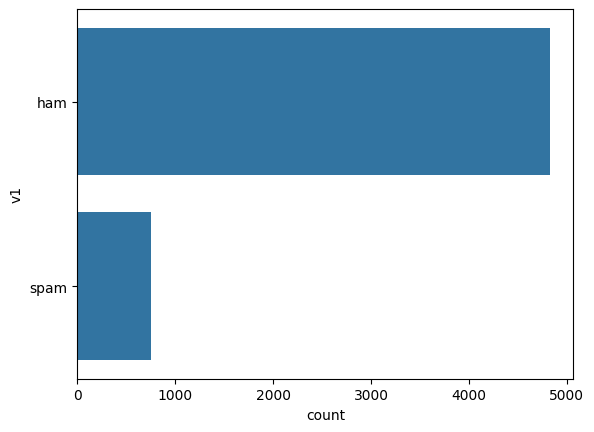

In [ ]:
# target variable distribution

sns.countplot(df_new['v1'])

In [ ]:
# changing spam->1 and ham->0, and renaming v1 and v2 as Category and Message respectively.

df_new['Category'] = df['v1'].map({'spam': 1, 'ham': 0})
df_new['Message'] = df['v2']
df_final = df_new.drop(columns = ['v1', 'v2'])
df_final

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


### Stop words removal, Lemmatization and Tokenization

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Stop words removal
stop_words = set(stopwords.words('english'))

# Lemmatization
lemmatizer = WordNetLemmatizer()

# Tokenization
def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words]  # Stop words removal and stemming
    return ' '.join(filtered_tokens)

df_final['Message'] = df_final['Message'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Removing special characters

def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return ' '.join(text.split())

df_final['Message'] = df_final['Message'].apply(preprocess_text)
df_final['Message']

,Message
0,go jurong point crazy available bugis n great ...
1,ok lar joking wif u oni
2,free entry wkly comp win fa cup final tkts st ...
3,u dun say early hor u c already say
4,nah nt think go usf life around though
...,...
5567,nd time tried contact u u pound prize claim ea...
5568,b going esplanade fr home
5569,pity mood suggestion
5570,guy bitching acted like d interested buying so...


### Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
df_vectorized = vectorization.fit_transform(df_final['Message'])
df_vectorized

<5572x7502 sparse matrix of type '<class 'numpy.float64'>'
	with 45257 stored elements in Compressed Sparse Row format>

In [ ]:
df_vectorized.shape

(5572, 7502)

### Dateset Splitting, Model Building and Evaluation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

X = df_vectorized
y = df_final['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = []

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_metrics = {
    'Model': 'Logistic Regression',
    'Test Accuracy': accuracy_score(y_test, lr_pred),
    'Train Accuracy': accuracy_score(y_train, lr_model.predict(X_train)),
    'Precision': precision_score(y_test, lr_pred),
    'Recall': recall_score(y_test, lr_pred),
    'F1 score': f1_score(y_test, lr_pred),
    'Train confusion matrix': confusion_matrix(y_train, lr_model.predict(X_train)),
    'Test confusion matrix': confusion_matrix(y_test, lr_pred)

}
results.append(lr_metrics)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_metrics = {
    'Model': 'Random Forest',
    'Test Accuracy': accuracy_score(y_test, rf_pred),
    'Train Accuracy': accuracy_score(y_train, rf_model.predict(X_train)),
    'Precision': precision_score(y_test, rf_pred),
    'Recall': recall_score(y_test, rf_pred),
    'F1 score': f1_score(y_test, rf_pred),
    'Train confusion matrix': confusion_matrix(y_train, rf_model.predict(X_train)),
    'Test confusion matrix': confusion_matrix(y_test, rf_pred)

}
results.append(rf_metrics)

# Ada Boost
ad_model = AdaBoostClassifier()
ad_model.fit(X_train, y_train)
ad_pred = ad_model.predict(X_test)
ad_metrics = {
    'Model': 'Ada boost classifier',
    'Test Accuracy': accuracy_score(y_test, ad_pred),
    'Train Accuracy': accuracy_score(y_train, ad_model.predict(X_train)),
    'Precision': precision_score(y_test, ad_pred),
    'Recall': recall_score(y_test, ad_pred),
    'F1 score': f1_score(y_test, ad_pred),
    'Train confusion matrix': confusion_matrix(y_train, ad_model.predict(X_train)),
    'Test confusion matrix': confusion_matrix(y_test, ad_pred)
}
results.append(ad_metrics)

#  KNN Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_metrics = {
    'Model': 'KNN Classifier',
    'Test Accuracy': accuracy_score(y_test, knn_pred),
    'Train Accuracy': accuracy_score(y_train, knn_model.predict(X_train)),
    'Precision': precision_score(y_test, knn_pred),
    'Recall': recall_score(y_test, knn_pred),
    'F1 score': f1_score(y_test, knn_pred),
    'Train confusion matrix': confusion_matrix(y_train, knn_model.predict(X_train)),
    'Test confusion matrix': confusion_matrix(y_test, knn_pred)
}
results.append(knn_metrics)

# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_metrics = { 'Model': 'Support Vector Machine', 'Test Accuracy': accuracy_score(y_test, svm_pred),
               'Train Accuracy': accuracy_score(y_train, svm_model.predict(X_train)),
                'Precision': precision_score(y_test, svm_pred, average='weighted'),
                'Recall': recall_score(y_test, svm_pred, average='weighted'),
                'F1 score': f1_score(y_test, svm_pred, average='weighted'),
                'Train confusion matrix': confusion_matrix(y_train, svm_model.predict(X_train)),
                'Test confusion matrix': confusion_matrix(y_test, svm_pred)
}
results.append(svm_metrics)
# Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)
gbc_pred = gbc_model.predict(X_test)
gbc_metrics = { 'Model': 'Gradient Boosting Classifier',
               'Test Accuracy': accuracy_score(y_test, gbc_pred),
                'Train Accuracy': accuracy_score(y_train, gbc_model.predict(X_train)),
                'Precision': precision_score(y_test, gbc_pred, average='weighted'),
                'Recall': recall_score(y_test, gbc_pred, average='weighted'),
                'F1 score': f1_score(y_test, gbc_pred, average='weighted'),
                'Train confusion matrix': confusion_matrix(y_train, gbc_model.predict(X_train)),
                'Test confusion matrix': confusion_matrix(y_test, gbc_pred)
}
results.append(gbc_metrics)
# XGBoost Classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_metrics = { 'Model': 'XGBoost Classifier',
               'Test Accuracy': accuracy_score(y_test, xgb_pred),
                'Train Accuracy': accuracy_score(y_train, xgb_model.predict(X_train)),
                'Precision': precision_score(y_test, xgb_pred, average='weighted'),
                'Recall': recall_score(y_test, xgb_pred, average='weighted'),
                'F1 score': f1_score(y_test, xgb_pred, average='weighted'),
                'Train confusion matrix': confusion_matrix(y_train, xgb_model.predict(X_train)),
                'Test confusion matrix': confusion_matrix(y_test, xgb_pred)
}
results.append(xgb_metrics)


# Create DataFrame for results
results_df = pd.DataFrame(results)
results_df

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Model,Test Accuracy,Train Accuracy,Precision,Recall,F1 score,Train confusion matrix,Test confusion matrix
0,Logistic Regression,0.947085,0.968813,0.950495,0.640000,0.764940,"[[3855, 5], [134, 463]]","[[960, 5], [54, 96]]"
1,Random Forest,0.976682,1.000000,1.000000,0.826667,0.905109,"[[3860, 0], [0, 597]]","[[965, 0], [26, 124]]"
2,Ada boost classifier,0.964126,0.976217,0.966102,0.760000,0.850746,"[[3837, 23], [83, 514]]","[[961, 4], [36, 114]]"
3,KNN Classifier,0.918386,0.925062,1.000000,0.393333,0.564593,"[[3859, 1], [333, 264]]","[[965, 0], [91, 59]]"
4,Support Vector Machine,0.972197,0.997308,0.972511,0.972197,0.971014,"[[3860, 0], [12, 585]]","[[963, 2], [29, 121]]"
5,Gradient Boosting Classifier,0.962332,0.978012,0.963082,0.962332,0.959964,"[[3855, 5], [93, 504]]","[[963, 2], [40, 110]]"
6,XGBoost Classifier,0.974888,0.990801,0.974567,0.974888,0.974284,"[[3859, 1], [40, 557]]","[[959, 6], [22, 128]]"
